In [1]:
# Instalación
!pip install pandas matplotlib seaborn openpyxl --quiet

# Importación de librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Sección nueva

In [2]:
from google.colab import files
uploaded = files.upload()


Saving patentamientos_enero_2025.xlsx to patentamientos_enero_2025.xlsx


In [8]:
# Cargar de hoja
df = xls.parse('patentamientos_enero_20251')

# Limpiar datos
df['Fecha_Patentamiento'] = pd.to_datetime(df['Fecha_Patentamiento'], errors='coerce')
df['Precio_ARS'] = pd.to_numeric(df['Precio_ARS'], errors='coerce')

# Ver valores faltantes
print(df.isnull().sum())


ID_Patente                 0
Marca                      0
Modelo                 57615
Version                    0
Motor                      0
Energía                    0
Color                      0
Origen                     0
Fecha_Patentamiento        0
Concesionario              0
Precio_ARS                 0
Provincia                  0
Forma_Compra               0
dtype: int64


El precio de los vehículos varía significativamente según la provincia y la forma de compra???

Existen diferencias notables en el precio dependiendo del tipo de energía (por ejemplo, gasolina vs. híbrido).???

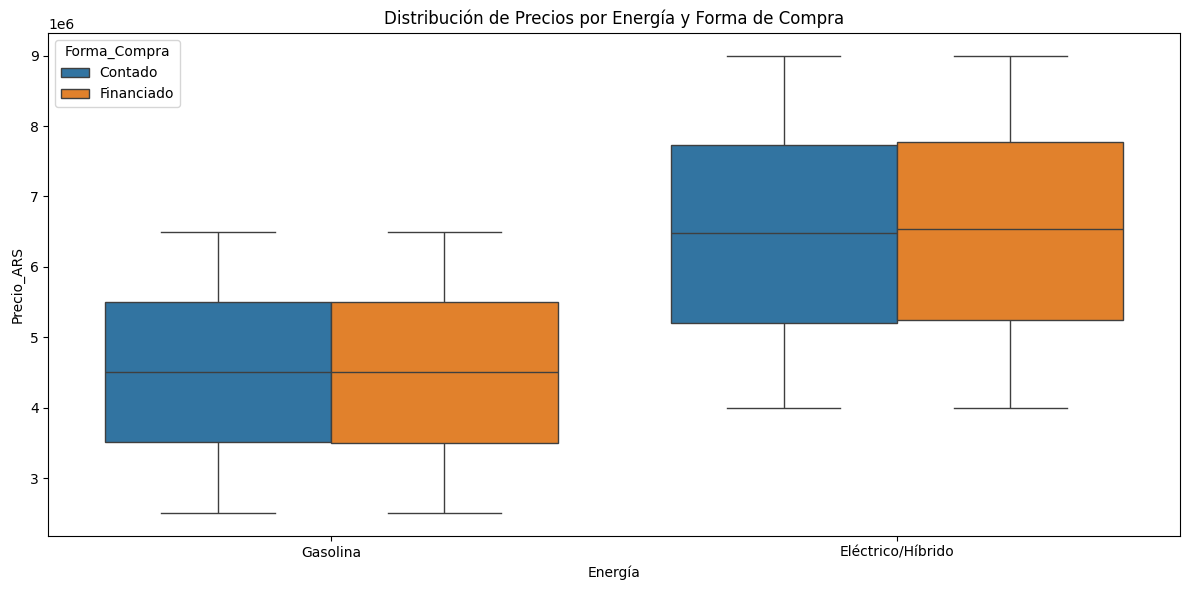

In [10]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Energía', y='Precio_ARS', hue='Forma_Compra')
plt.title('Distribución de Precios por Energía y Forma de Compra')
plt.tight_layout()
plt.show()


Los vehículos a gasolina dominan claramente el mercado, con precios distribuidos en un amplio rango.

Las diferencias de precio entre formas de compra son más evidentes en gasolina: el contado tiende a precios más bajos.

Otras energías (si existen) son poco representativas en el dataset, lo cual podría indicar una baja adopción de tecnologías alternativas.

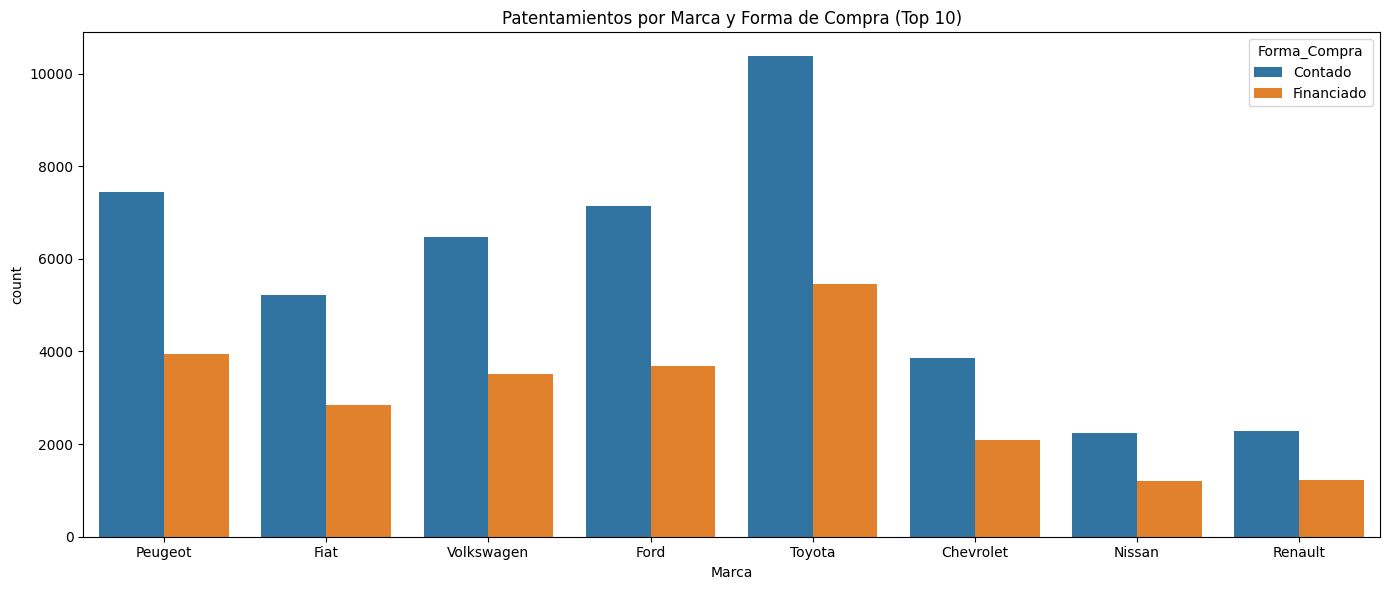

In [11]:
top_marcas = df['Marca'].value_counts().nlargest(10).index
df_top = df[df['Marca'].isin(top_marcas)]

plt.figure(figsize=(14, 6))
sns.countplot(data=df_top, x='Marca', hue='Forma_Compra')
plt.title('Patentamientos por Marca y Forma de Compra (Top 10)')
plt.tight_layout()
plt.show()


Las marcas más populares como Peugeot, Toyota, y Volkswagen dominan en número de patentamientos.

Algunas marcas muestran mayor tendencia al financiamiento, lo que puede deberse a estrategias comerciales específicas o al perfil económico de sus compradores.

Este gráfico apoya la hipótesis de que la forma de compra podría estar influenciada por la marca y su oferta crediticia.

Existe un modelo que domina el mercado de patentamientos en enero 2025.?

Top 10 modelos más vendidos:
   Modelo  Cantidad
0   208.0      7263
1  2008.0      4110


<ipython-input-14-6faf9b59998f>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_modelos, x='Modelo', y='Cantidad', palette='magma')


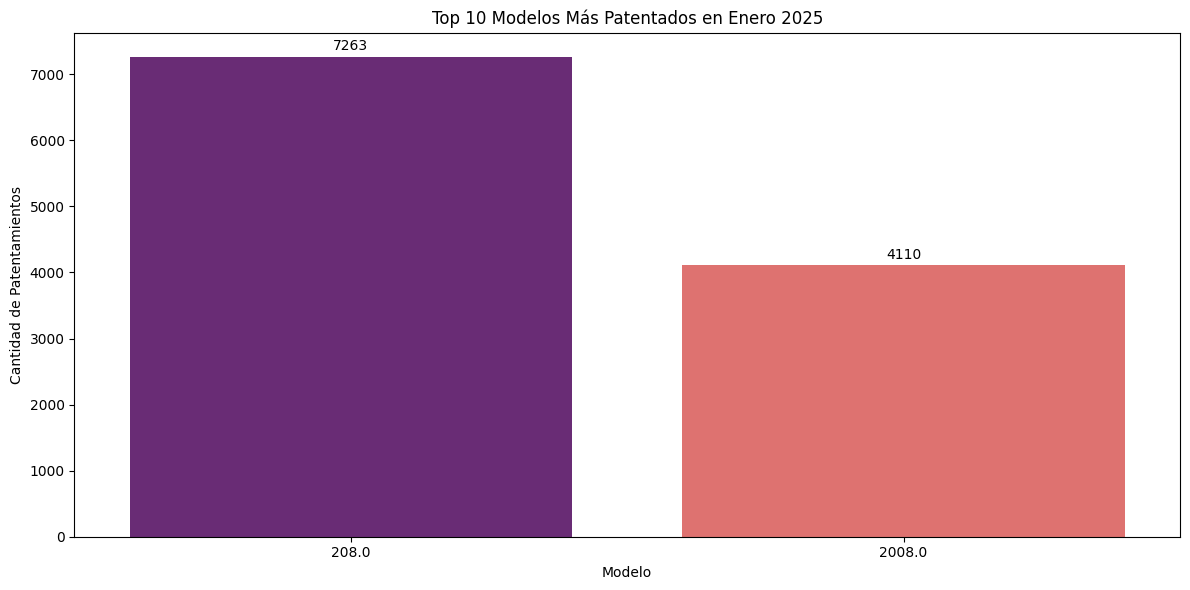

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el archivo Excel (ya subido previamente con files.upload)
xls = pd.ExcelFile('patentamientos_enero_2025.xlsx')
df = xls.parse('patentamientos_enero_20251')

# Contar la cantidad de veces que aparece cada modelo
model_counts = df['Modelo'].value_counts().reset_index()
model_counts.columns = ['Modelo', 'Cantidad']

# Tomar los 10 modelos más vendidos
top_modelos = model_counts.head(10)

# Mostrar la tabla de los top 10
print("Top 10 modelos más vendidos:")
print(top_modelos)

# Gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(data=top_modelos, x='Modelo', y='Cantidad', palette='magma')

# Agregar los números sobre cada barra
for index, row in top_modelos.iterrows():
    plt.text(x=index, y=row['Cantidad'] + 100, s=int(row['Cantidad']), ha='center')

plt.title('Top 10 Modelos Más Patentados en Enero 2025')
plt.ylabel('Cantidad de Patentamientos')
plt.xlabel('Modelo')
plt.tight_layout()
plt.show()


el modelo 208.0 es el más vendido en enero 2025, mostrando una fuerte preferencia del mercado hacia este modelo específico. Esto podría deberse a su precio competitivo, disponibilidad o promociones activas de la marca y concesionarios

            Modelo_Completo  Cantidad
0        Fiat nan Precision      6175
1      Peugeot 208.0 Allure      5930
2  Volkswagen nan Trendline      5584
3              Ford nan XLT      5531
4   Volkswagen nan Highline      4406
5             Toyota nan SR      4083
6            Toyota nan HEV      3842
7            Ford nan XLT_H      3383
8          Chevrolet nan LT      3362
9            Toyota nan XEI      3288


<ipython-input-15-f7e04f7a4706>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_modelos, x='Cantidad', y='Modelo_Completo', palette='cubehelix')


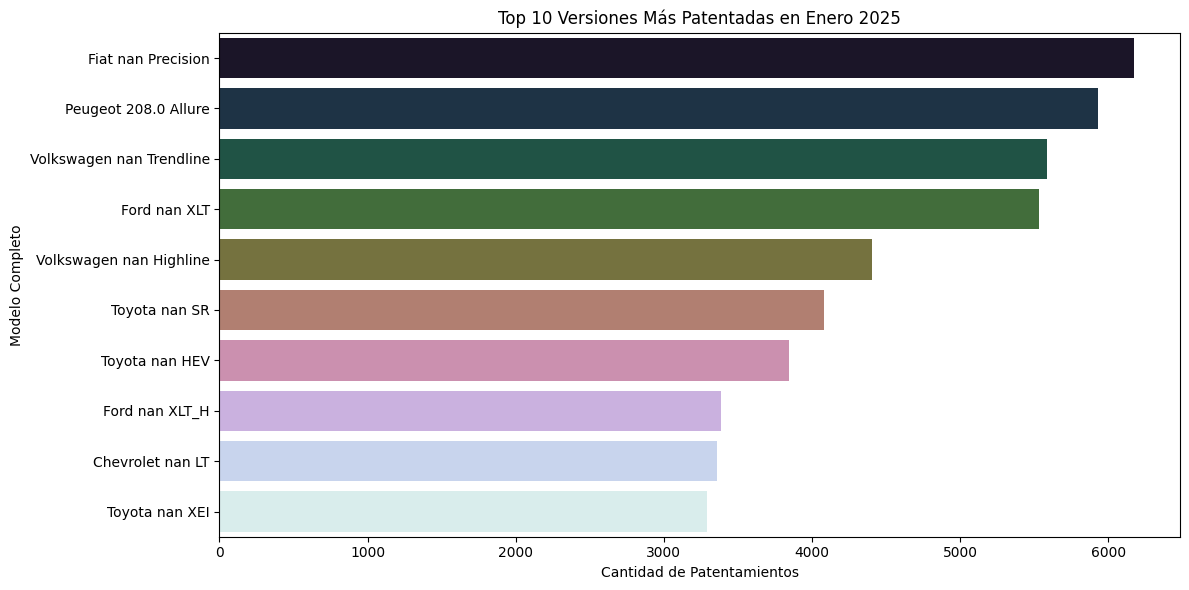

In [15]:
# Crear una columna compuesta: Marca + Modelo + Versión
df['Modelo_Completo'] = df['Marca'].astype(str) + " " + df['Modelo'].astype(str) + " " + df['Version'].astype(str)

# Contar los modelos completos
model_counts = df['Modelo_Completo'].value_counts().reset_index()
model_counts.columns = ['Modelo_Completo', 'Cantidad']

# Top 10
top_modelos = model_counts.head(10)

# Mostrar
print(top_modelos)

# Gráfico
plt.figure(figsize=(12, 6))
sns.barplot(data=top_modelos, x='Cantidad', y='Modelo_Completo', palette='cubehelix')
plt.title('Top 10 Versiones Más Patentadas en Enero 2025')
plt.xlabel('Cantidad de Patentamientos')
plt.ylabel('Modelo Completo')
plt.tight_layout()
plt.show()


si buscamos por version, la version de fiat cronos precision es la mas vendida